In [ ]:
import tensorflow as tf

from keras import datasets, layers, models
import matplotlib.pyplot as plt
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sourikbanerjee
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:31<00:00, 93.5MB/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_data = train_datagen.flow_from_directory(
        './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size= 32,
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_data = validation_datagen.flow_from_directory(
        './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size= 8,
        class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
base_model = tf.keras.applications.DenseNet121(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

#Adding custom Layers
input = tf.keras.layers.Input(shape = (224, 224, 3))
x = model.output(input)
x = base_model(x, training = False)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = tf.keras.layers.Dense(38, activation="softmax")(x)
model= tf.keras.Model(inputs = input, outputs = output)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
test_generator = validation_datagen.flow_from_directory(
        './new-plant-diseases-dataset/test',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size= 30,
        class_mode='categorical')
X_test, y_test = test_generator.next()

Found 33 images belonging to 1 classes.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),loss='categorical_crossentropy', metrics='Accuracy')

In [ ]:
model_history = model.fit(train_data, epochs = 1, batch_size = 32, validation_data = validation_data, validation_batch_size= 8 )

2197/2197 [==============================] - 16031s 7s/step - loss: 0.5421 - Accuracy: 0.8434 - val_loss: 0.2269 - val_Accuracy: 0.9249


In [ ]:
model.save("/content/drive/MyDrive/SET Project 2/DNmodel")

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
predict = model.predict(X_test)
print(predict)

1/1 [==============================] - 7s 7s/step
[[4.1206384e-08 1.5126490e-08 4.6297984e-07 ... 9.1294527e-01
  1.8493120e-03 3.1027437e-07]
 [2.3231044e-06 1.3027315e-05 5.5748766e-05 ... 8.1832513e-07
  1.8794405e-04 9.0385252e-01]
 [2.1003973e-05 5.5844504e-07 7.4160232e-07 ... 2.3547034e-07
  1.6777844e-09 3.5434962e-07]
 ...
 [9.9530471e-06 1.9778769e-05 3.0229108e-05 ... 1.6106400e-04
  1.4501692e-05 9.7682536e-01]
 [1.2797015e-04 9.3936596e-06 1.1430688e-04 ... 2.1085270e-08
  1.3558401e-08 2.6340044e-07]
 [5.9560343e-04 1.3562704e-04 2.6066018e-06 ... 5.1812911e-08
  1.4963716e-06 9.4341822e-06]]


In [ ]:
model.evaluate(validation_data)

2197/2197 [==============================] - 2967s 1s/step - loss: 0.2269 - Accuracy: 0.9249


[0.2268737554550171, 0.9248805046081543]

In [ ]:
preds = model.predict(validation_data)
preds = tf.math.round(preds).numpy()
preds = preds.argmax(axis=1)

2197/2197 [==============================] - 3018s 1s/step


In [ ]:
from sklearn import metrics

In [ ]:
import seaborn as sns

<Axes: >

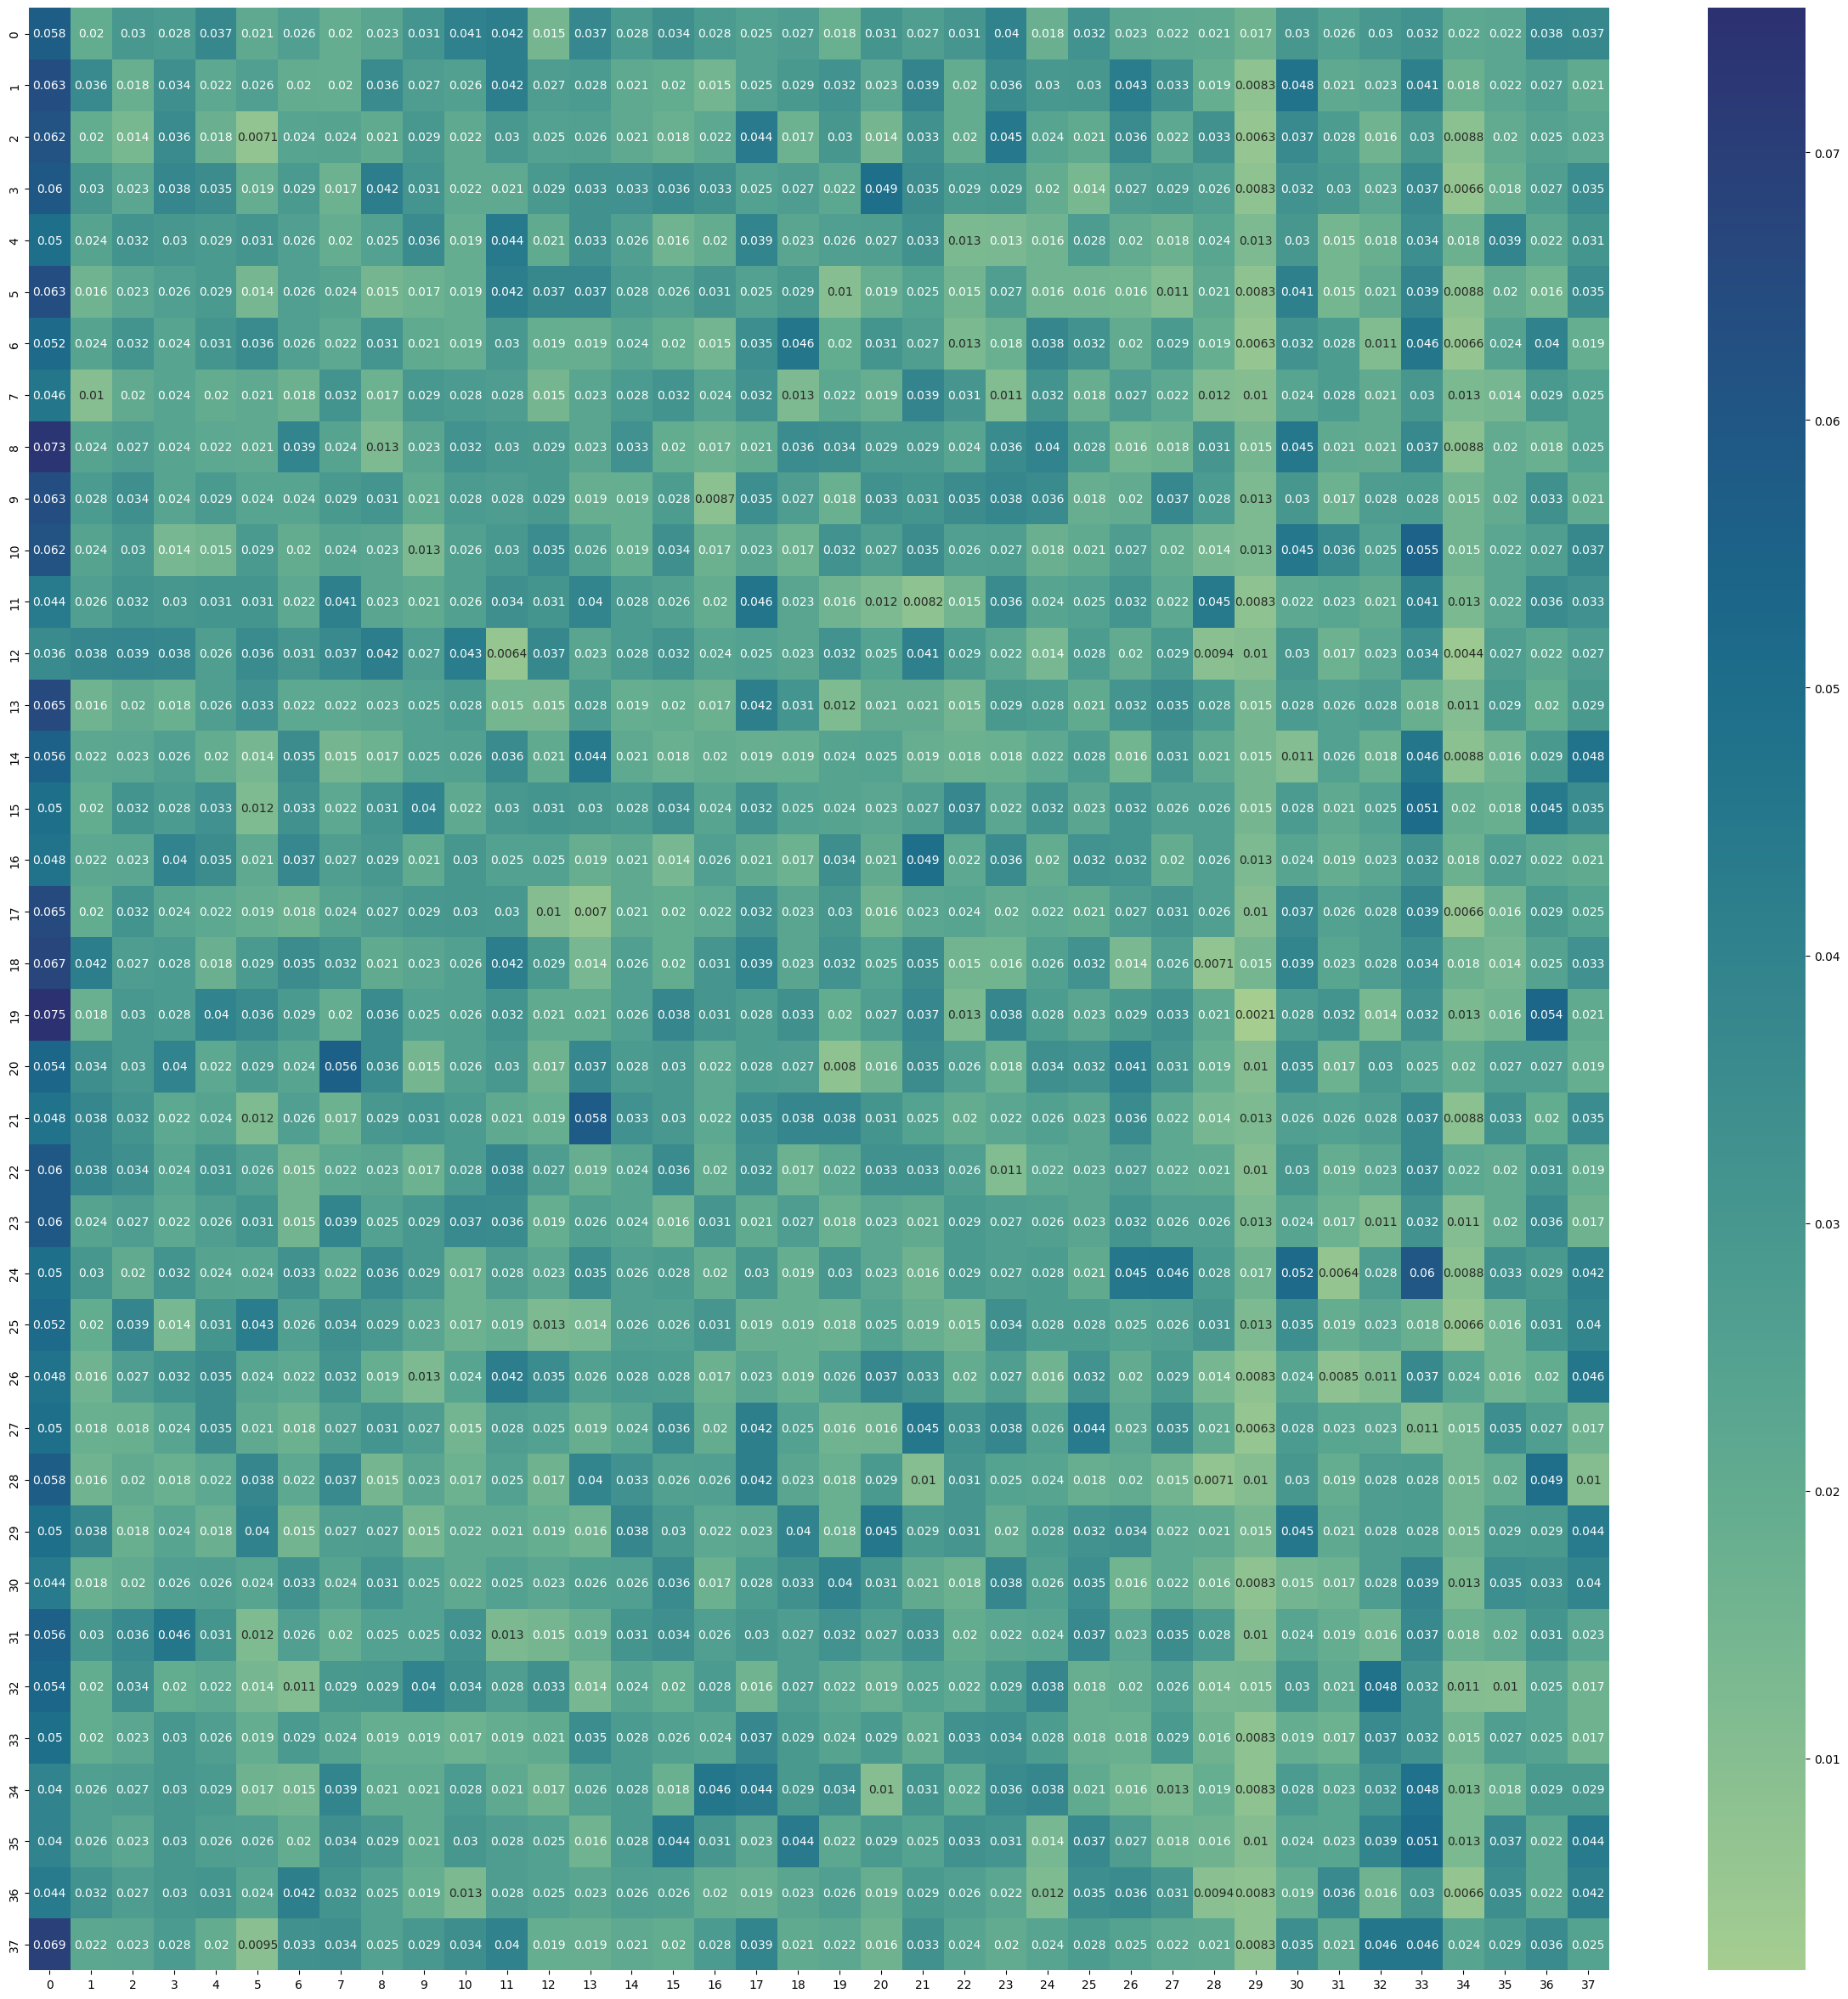

In [ ]:
cm = metrics.confusion_matrix(validation_data.classes, preds)
cm = cm.astype("float") / cm.sum(axis=1)
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, cmap="crest")